In [6]:
import numpy as np
import matplotlib.pyplot as plt
import mastcasjobs

In [48]:
query = """SELECT o.objID, o.raMean, o.decMean, o.ndetections,
        o.ng, o.nr, o.ni, o.nz, o.ny, o.gMeanPSFMag, 
        o.rMeanPSFMag,o.iMeanPSFMag,o.zMeanPSFMag,o.yMeanPSFMag
        FROM fGetNearbyObjEq(187.706, 12.391, 60.0) AS nb
        INNER JOIN MeanObjectView As o ON o.objID = nb.objID
        WHERE o.ng > 0 AND o.nr > 0 AND o.ni > 0 AND o.nz > 0 AND o.ny > 0
        """

jobs = mastcasjobs.MastCasJobs(context = "PanSTARRS_DR2")
results = jobs.quick(query, task_name = "python API trial")
print(results)

      objID             raMean          decMean      ... zMeanPSFMag yMeanPSFMag
------------------ ---------------- ---------------- ... ----------- -----------
121811878912337375  187.89119436293 11.5140579225215 ...     19.6926     19.4488
121811879939009279 187.993842098905 11.5156373199299 ...     20.1989     19.8246
121991875161287781 187.516157993612 11.6644251230769 ...     18.2144     18.0344
121741879726609978 187.972667076619 11.4578901086818 ...     19.5955      19.539
121701877974424048 187.797358965329 11.4196476618392 ...      21.027     20.2863
121901875838473663 187.583893560815 11.5859154400673 ...      20.794     20.2434
121901877000526685 187.699978284856 11.5884936480181 ...      19.077     18.9147
121901877857632596 187.785631662162 11.5851612117595 ...     20.2535      19.967
121821872045419851 187.204502747304 11.5245222582091 ...      21.067     19.8553
121821872858024810 187.285785148079 11.5202551450127 ...     20.4559      20.071
               ...          

In [44]:
data = results.columns[1,2,9,10]
xvalues = data[1]
print(xvalues)

    decMean     
----------------
12.2564303134365
12.2617966712767
12.2621467490952
12.2589266477693
12.2634122745492
12.2593902128606
12.2593836774911
 12.258009064748
12.2598963752644
12.2637913751606
             ...
12.4983628360207
12.4955009035697
12.4946875380767
12.4953698760292
12.4971240216772
12.4974866343207
12.4937429105772
12.4970935497275
12.3526900516029
12.3554220291971
12.3531252725179
Length = 828 rows


In [49]:
xvalues = data[0] - np.average(data[0])
yvalues = data[1] - np.average(data[1])
gMeanPSFMag = data[2]
rMeanPSFMag = data[3]

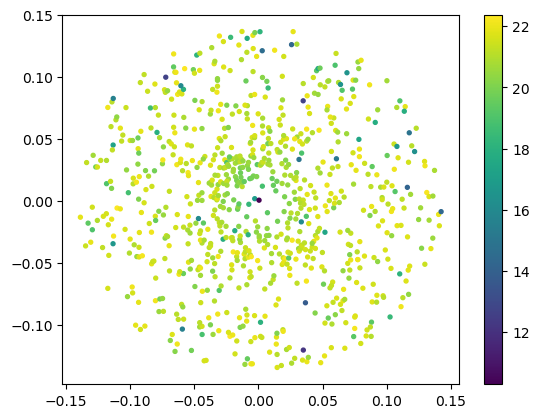

In [50]:
plt.scatter(xvalues, yvalues, s = 8, c = gMeanPSFMag)
plt.colorbar()

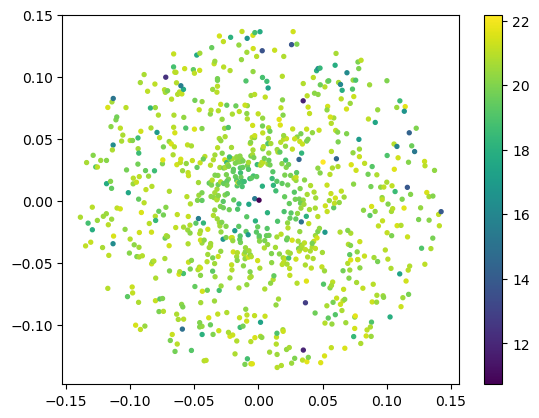

In [52]:
right_pos = np.where(rMeanPSFMag != -999)
plt.scatter(xvalues[right_pos], yvalues[right_pos], s = 8, c = rMeanPSFMag[right_pos])
plt.colorbar()